<a href="https://colab.research.google.com/github/ClarisseAlvarenga/DataScience_Comex_estudos/blob/master/Teste_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
data = pd.read_excel("/content/AMOSTRA_CNAE_LISTAS_RESTRITIVAS_ANONIMIZADA.v2.xlsx")

In [ ]:
data.head(10)

,Nr.,COD_TIPO,DTA_NASC_CSNT,PONTUACAO_ROC,Cód. Ativ. CNAE,Descr. Ativ. CNAE,NT_RISCO,NÍVEL RISCO,CD_PAIS_PCT_EXTR,PAIS,GAFI / P_FISCAL
0,1,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,BS,BAHAMAS,BACEN P_FISCAL
1,2,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,VG,ILHAS VIRGENS BRITANICAS,BB P_FISCAL
2,3,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,VG,ILHAS VIRGENS BRITANICAS,BACEN P_FISCAL
3,4,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,TR,TURQUIA,BACEN GAFI
4,5,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,NL,ANTILHAS HOLANDESAS,BACEN P_FISCAL
5,6,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,NL,HOLANDA,BACEN P_FISCAL
6,7,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,KY,ILHAS CAYMAN,BACEN P_FISCAL
7,8,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,KY,ILHAS CAYMAN,BACEN GAFI
8,9,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,HK,HONG KONG,BACEN P_FISCAL
9,10,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,BS,BAHAMAS,BB P_FISCAL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nr.                4775 non-null   int64  
 1   COD_TIPO           4775 non-null   int64  
 2   DTA_NASC_CSNT      4775 non-null   object 
 3   PONTUACAO_ROC      4775 non-null   float64
 4   Cód. Ativ. CNAE    4775 non-null   int64  
 5   Descr. Ativ. CNAE  4775 non-null   object 
 6   NT_RISCO           4775 non-null   float64
 7   NÍVEL RISCO        4775 non-null   object 
 8   CD_PAIS_PCT_EXTR   4775 non-null   object 
 9   PAIS               4775 non-null   object 
 10  GAFI / P_FISCAL    4775 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 410.5+ KB


In [ ]:
data.shape

(4775, 11)

In [ ]:
data.describe()

,Nr.,COD_TIPO,PONTUACAO_ROC,Cód. Ativ. CNAE,NT_RISCO
count,4775.000000,4775.0,4775.000000,4.775000e+03,4775.000000
mean,2388.000000,2.0,2.916124,3.772395e+06,1.856728
std,1378.568098,0.0,0.573252,2.126192e+06,1.613500
min,1.000000,2.0,1.940000,1.156000e+05,0.000000
25%,1194.500000,2.0,2.630000,2.221800e+06,1.000000
50%,2388.000000,2.0,2.810000,3.250701e+06,2.002291
75%,3581.500000,2.0,3.020000,4.689399e+06,3.006300
max,4775.000000,2.0,7.480000,9.601702e+06,7.227377


<Axes: >

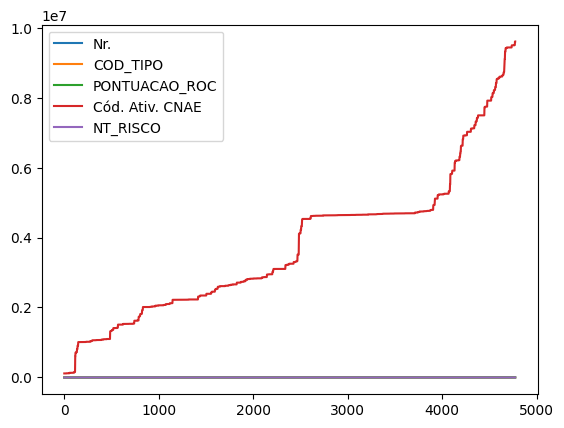

In [ ]:
data.plot()

In [ ]:
data["PONTUACAO_ROC"].describe()

count    4775.000000
mean        2.916124
std         0.573252
min         1.940000
25%         2.630000
50%         2.810000
75%         3.020000
max         7.480000
Name: PONTUACAO_ROC, dtype: float64

In [ ]:
pd.crosstab(index= data['PAIS'], columns= data['NÍVEL RISCO'], values=data['PONTUACAO_ROC'], aggfunc=['mean', 'median', 'std'])

mean                                            median  \
NÍVEL RISCO          ALTO     BAIXO     MEDIO MUITO ALTO MUITO BAIXO   ALTO   
PAIS                                                                          
AFRICA DO SUL    2.881111  2.702069  2.741333   2.818776         NaN  2.790   
ALBANIA               NaN       NaN  2.870000   1.940000         NaN    NaN   
ANDORRA          2.550000       NaN       NaN        NaN         NaN  2.550   
ANGUILLA              NaN       NaN  2.670000        NaN         NaN    NaN   
ANTIGUA BARBUDA  2.530000  3.570000  3.100000        NaN         NaN  2.530   
...                   ...       ...       ...        ...         ...    ...   
SUAZILANDIA           NaN       NaN       NaN   2.830000         NaN    NaN   
TONGA                 NaN  2.660000       NaN        NaN         NaN    NaN   
TURQUIA          3.111774  2.947292  2.922500   2.907632       2.585  2.855   
UGANDA                NaN  2.400000       NaN   2.705000         NaN    NaN   
VIETNA           2.797895  2.711250  2.730870   2.700000       2.280  2.760   

                                                          std            \
NÍVEL RISCO      BAIXO MEDIO MUITO ALTO MUITO BAIXO      ALTO     BAIXO   
PAIS                                                                      
AFRICA DO SUL    2.630  2.81      2.780         NaN  0.360313  0.424031   
ALBANIA            NaN  2.87      1.940         NaN       NaN       NaN   
ANDORRA            NaN   NaN        NaN         NaN       NaN       NaN   
ANGUILLA           NaN  2.67        NaN         NaN       NaN       NaN   
ANTIGUA BARBUDA  3.570  3.10        NaN         NaN       NaN  1.018234   
...                ...   ...        ...         ...       ...       ...   
SUAZILANDIA        NaN   NaN      2.830         NaN       NaN       NaN   
TONGA            2.660   NaN        NaN         NaN       NaN       NaN   
TURQUIA          2.745  2.75      2.765       2.585  0.754637  0.768172   
UGANDA           2.400   NaN      2.705         NaN       NaN  0.000000   
VIETNA           2.705  2.80      2.720       2.280  0.196663  0.454779   

                                                  
NÍVEL RISCO         MEDIO MUITO ALTO MUITO BAIXO  
PAIS                                              
AFRICA DO SUL    0.343438   0.365677         NaN  
ALBANIA               NaN        NaN         NaN  
ANDORRA               NaN        NaN         NaN  
ANGUILLA              NaN        NaN         NaN  
ANTIGUA BARBUDA  0.000000        NaN         NaN  
...                   ...        ...         ...  
SUAZILANDIA           NaN        NaN         NaN  
TONGA                 NaN        NaN         NaN  
TURQUIA          0.766132   0.545584    0.431335  
UGANDA                NaN   0.016036         NaN  
VIETNA           0.297096   0.272077    0.000000  

[67 rows x 15 columns]

In [ ]:
data[['PONTUACAO_ROC','NT_RISCO']].corr()

,PONTUACAO_ROC,NT_RISCO
PONTUACAO_ROC,1.000000,0.068007
NT_RISCO,0.068007,1.000000


In [ ]:
data.columns

Index(['Nr.', 'COD_TIPO', 'DTA_NASC_CSNT', 'PONTUACAO_ROC', 'Cód. Ativ. CNAE',
       'Descr. Ativ. CNAE', 'NT_RISCO', 'NÍVEL RISCO', 'CD_PAIS_PCT_EXTR',
       'PAIS', 'GAFI / P_FISCAL'],
      dtype='object')

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
data.set_index(data['Nr.'], inplace=True, drop=True)
data.drop('Nr.', axis=1, inplace=True)

profile = ProfileReport(data, title="Pandas Profiling Report")
data.head(5)

,COD_TIPO,DTA_NASC_CSNT,PONTUACAO_ROC,Cód. Ativ. CNAE,Descr. Ativ. CNAE,NT_RISCO,NÍVEL RISCO,CD_PAIS_PCT_EXTR,PAIS,GAFI / P_FISCAL
Nr.,,,,,,,,,,
1,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,BS,BAHAMAS,BACEN P_FISCAL
2,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,VG,ILHAS VIRGENS BRITANICAS,BB P_FISCAL
3,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,VG,ILHAS VIRGENS BRITANICAS,BACEN P_FISCAL
4,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,TR,TURQUIA,BACEN GAFI
5,2,5/27/2003,2.39,115600,CULTIVO DE SOJA,4.015464,MUITO ALTO,NL,ANTILHAS HOLANDESAS,BACEN P_FISCAL


In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.2 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

my_report = sv.analyze(data, target_feat='NT_RISCO')
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data.columns


Index(['COD_TIPO', 'DTA_NASC_CSNT', 'PONTUACAO_ROC', 'Cód. Ativ. CNAE',
       'Descr. Ativ. CNAE', 'NT_RISCO', 'NÍVEL RISCO', 'CD_PAIS_PCT_EXTR',
       'PAIS', 'GAFI / P_FISCAL'],
      dtype='object')

In [ ]:
X= data[['COD_TIPO', 'PONTUACAO_ROC', 'Cód. Ativ. CNAE', 'CD_PAIS_PCT_EXTR','GAFI / P_FISCAL']]
y= data['NT_RISCO']

In [ ]:
data.columns


Index(['COD_TIPO', 'DTA_NASC_CSNT', 'PONTUACAO_ROC', 'Cód. Ativ. CNAE',
       'Descr. Ativ. CNAE', 'NT_RISCO', 'NÍVEL RISCO', 'CD_PAIS_PCT_EXTR',
       'PAIS', 'GAFI / P_FISCAL'],
      dtype='object')

In [ ]:
X = sm.add_constant(X)


In [ ]:
import sklearn

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier